In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("default")
%matplotlib inline
%config InlineBackend.figure_format = "retina"
pd.set_option("mode.copy_on_write", True)

In [44]:
train = pd.read_csv("../data/train.csv", index_col="id")
train

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,B,A,A,A,A,B,A,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
2,A,B,A,A,A,A,A,A,B,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
5,A,B,A,A,B,A,A,A,B,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
10,B,B,A,B,A,A,A,A,B,A,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
11,A,B,A,B,A,A,A,A,B,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587620,A,B,A,A,A,A,A,A,B,A,...,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216,1198.62
587624,A,A,A,A,A,B,A,A,A,A,...,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,1108.34
587630,A,B,A,A,A,A,A,B,B,A,...,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888,5762.64


In [45]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 188318 entries, 1 to 587633
Data columns (total 131 columns):
 #    Column  Dtype  
---   ------  -----  
 0    cat1    object 
 1    cat2    object 
 2    cat3    object 
 3    cat4    object 
 4    cat5    object 
 5    cat6    object 
 6    cat7    object 
 7    cat8    object 
 8    cat9    object 
 9    cat10   object 
 10   cat11   object 
 11   cat12   object 
 12   cat13   object 
 13   cat14   object 
 14   cat15   object 
 15   cat16   object 
 16   cat17   object 
 17   cat18   object 
 18   cat19   object 
 19   cat20   object 
 20   cat21   object 
 21   cat22   object 
 22   cat23   object 
 23   cat24   object 
 24   cat25   object 
 25   cat26   object 
 26   cat27   object 
 27   cat28   object 
 28   cat29   object 
 29   cat30   object 
 30   cat31   object 
 31   cat32   object 
 32   cat33   object 
 33   cat34   object 
 34   cat35   object 
 35   cat36   object 
 36   cat37   object 
 37   cat38   object 
 38   cat39  

In [46]:
cat_cols = [col for col in train.columns if col.startswith("cat")]
num_cols = [col for col in train.columns if col.startswith("cont")]

In [47]:
train.isna().any().sum()

0

In [48]:
for col in cat_cols:
    print(train[col].value_counts())

cat1
A    141550
B     46768
Name: count, dtype: int64
cat2
A    106721
B     81597
Name: count, dtype: int64
cat3
A    177993
B     10325
Name: count, dtype: int64
cat4
A    128395
B     59923
Name: count, dtype: int64
cat5
A    123737
B     64581
Name: count, dtype: int64
cat6
A    131693
B     56625
Name: count, dtype: int64
cat7
A    183744
B      4574
Name: count, dtype: int64
cat8
A    177274
B     11044
Name: count, dtype: int64
cat9
A    113122
B     75196
Name: count, dtype: int64
cat10
A    160213
B     28105
Name: count, dtype: int64
cat11
A    168186
B     20132
Name: count, dtype: int64
cat12
A    159825
B     28493
Name: count, dtype: int64
cat13
A    168851
B     19467
Name: count, dtype: int64
cat14
A    186041
B      2277
Name: count, dtype: int64
cat15
A    188284
B        34
Name: count, dtype: int64
cat16
A    181843
B      6475
Name: count, dtype: int64
cat17
A    187009
B      1309
Name: count, dtype: int64
cat18
A    187331
B       987
Name: count, dtype: int64
c

In [49]:
type_dict = {col: "category" for col in cat_cols}
train = train.astype(type_dict)

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188318 entries, 1 to 587633
Columns: 131 entries, cat1 to loss
dtypes: category(116), float64(15)
memory usage: 44.2 MB


# EDA

In [51]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop="if_binary", handle_unknown="ignore")

col_transformer = make_column_transformer((ohe, cat_cols), remainder="passthrough")
col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='if_binary',
                                               handle_unknown='ignore'),
                                 ['cat1', 'cat2', 'cat3', 'cat4', 'cat5',
                                  'cat6', 'cat7', 'cat8', 'cat9', 'cat10',
                                  'cat11', 'cat12', 'cat13', 'cat14', 'cat15',
                                  'cat16', 'cat17', 'cat18', 'cat19', 'cat20',
                                  'cat21', 'cat22', 'cat23', 'cat24', 'cat25',
                                  'cat26', 'cat27', 'cat28', 'cat29', 'cat30', ...])])

<Axes: >

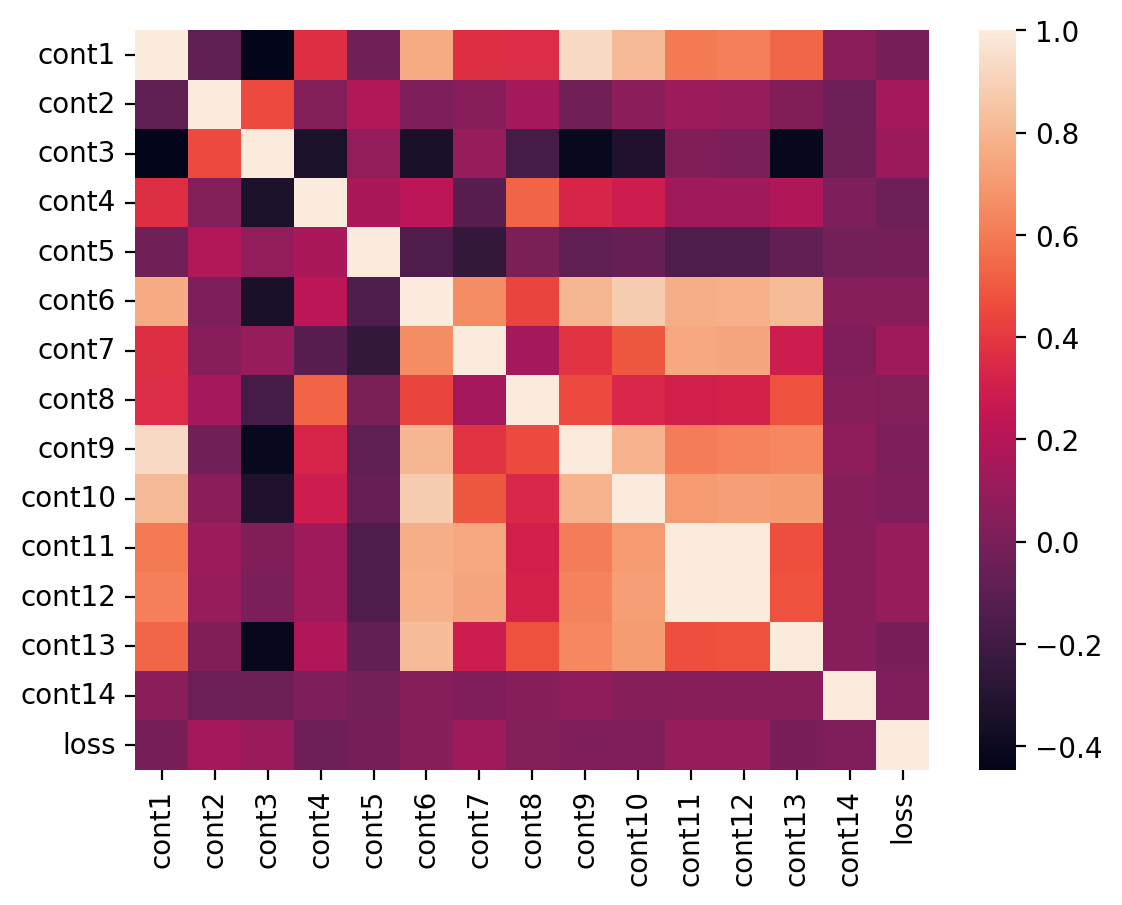

In [52]:
sns.heatmap(train.corr(numeric_only=True))

In [53]:
correlated_cols = ["cont11", "cont1", "cont6"]

In [54]:
train_dropped = train.drop(columns=correlated_cols)

In [58]:
X = train_dropped.drop(columns="loss")
y = train_dropped.loss

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

models = [
    "LINR",
    "Ridge",
    "Lasso",
    "SGD",
    "RandomForest",
    "GradientBoost",
    "xgb"
]

In [85]:
from sklearn.model_selection import cross_val_score

def append_score(estimator):
    pipeline = make_pipeline(col_transformer, estimator)
    score = cross_val_score(pipeline, X_train, y_train, n_jobs=-1, scoring="neg_mean_absolute_error")
    mse = - score.mean()
    scores.append(mse)

scores = []

print("LNR")
append_score(
    LinearRegression()
)
print("Ridge")
append_score(
    Ridge()
)
print("Lasso")
append_score(
    Lasso()
)
print("SGD")
append_score(
    SGDRegressor()
)
print("SVR")
append_score(
    LinearSVR()
)

print("Gradient")
append_score(
    GradientBoostingRegressor()
)
print("XGB")
append_score(
    XGBRegressor()
)


LNR


/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [74, 100, 108, 109, 110, 113, 115] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [106, 109, 113, 114, 115] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [88, 101, 104, 108, 109, 112, 114, 115] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/python3.10/site-pa

Ridge


/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [74, 100, 108, 109, 110, 113, 115] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [106, 109, 113, 114, 115] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [88, 89, 100, 108, 109, 110, 112, 113, 115] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/python3.10/sit

Lasso


/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [106, 109, 113, 114, 115] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [91, 105, 108, 109, 112, 115] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [74, 100, 108, 109, 110, 113, 115] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/python3.10/site-packages/skl

SGD


/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [88, 101, 104, 108, 109, 112, 114, 115] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [106, 109, 113, 114, 115] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [88, 89, 100, 108, 109, 110, 112, 113, 115] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/python3.1

SVR


/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [91, 105, 108, 109, 112, 115] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [88, 89, 100, 108, 109, 110, 112, 113, 115] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [88, 101, 104, 108, 109, 112, 114, 115] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/pytho

Gradient


/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [74, 100, 108, 109, 110, 113, 115] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [106, 109, 113, 114, 115] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [88, 89, 100, 108, 109, 110, 112, 113, 115] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/python3.10/sit

XGB


/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [74, 100, 108, 109, 110, 113, 115] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [91, 105, 108, 109, 112, 115] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [88, 101, 104, 108, 109, 112, 114, 115] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/python3.10/sit

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'LINR'),
  Text(1, 0, 'Ridge'),
  Text(2, 0, 'Lasso'),
  Text(3, 0, 'SGD'),
  Text(4, 0, 'RandomForest'),
  Text(5, 0, 'GradientBoost'),
  Text(6, 0, 'xgb')])

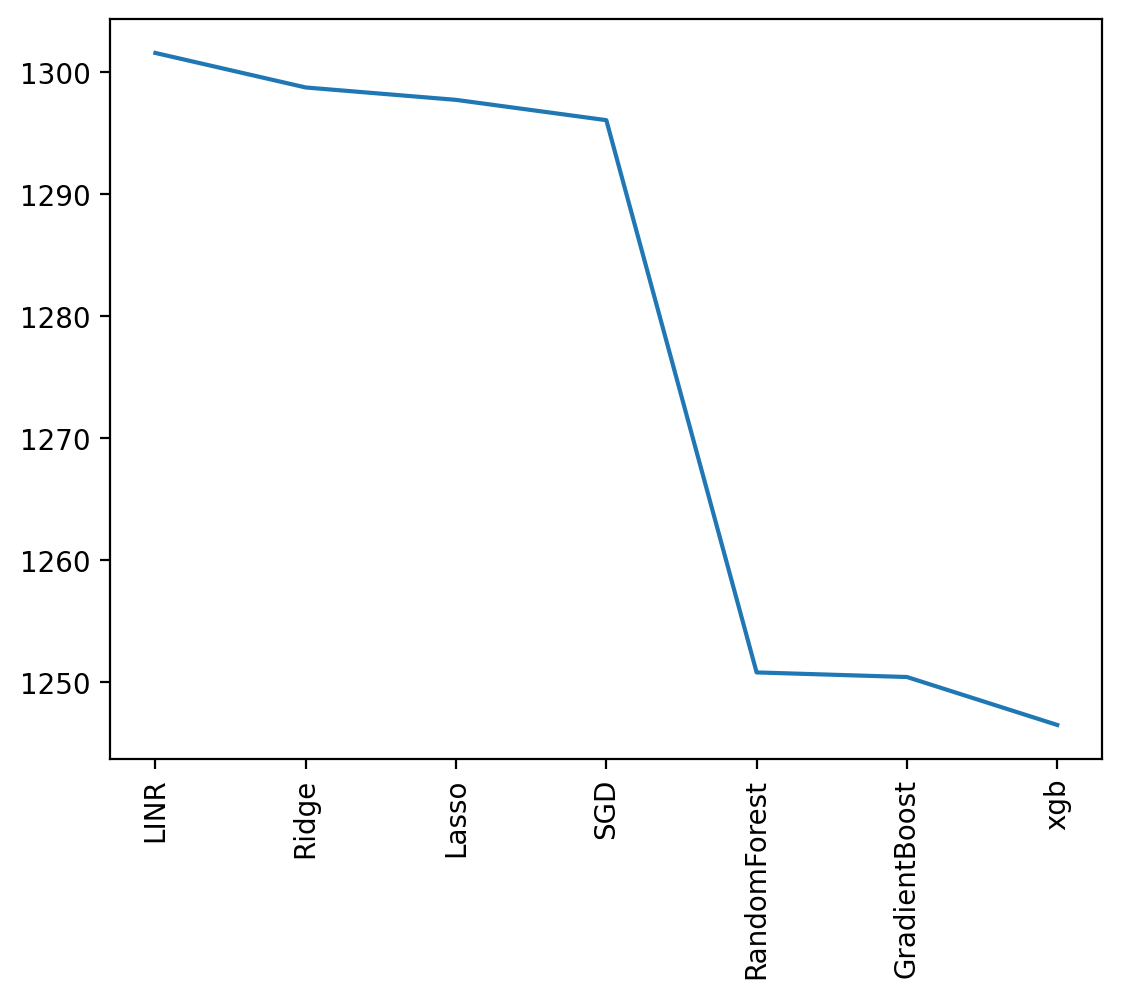

In [86]:
sns.lineplot(x=models, y=scores)
plt.xticks(rotation=90)

In [97]:
from sklearn.model_selection import GridSearchCV

pipeline = make_pipeline(col_transformer, XGBRegressor())

pipeline.get_params()

In [98]:
grid = {
    "xgbregressor__max_depth": [6, 8, 10, 12],
}

search = GridSearchCV(estimator=pipeline, param_grid=grid, n_jobs=-1, scoring="neg_mean_absolute_error")

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder',
                                    OneHotEncoder(drop='if_binary',
                                                  handle_unknown='ignore'),
                                    ['cat1', 'cat2', 'cat3', 'cat4', 'cat5',
                                     'cat6', 'cat7', 'cat8', 'cat9', 'cat10',
                                     'cat11', 'cat12', 'cat13', 'cat14', 'cat15',
                                     'cat16', 'cat17', 'cat18', 'cat19', 'cat20',
                                     'cat21', 'cat22', 'cat23', 'cat24', 'cat25',
                                     'cat26', 'cat27', 'cat28', 'cat29', 'cat30', ...])])),
  ('xgbregressor',
   XGBRegressor(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_ro

In [99]:
search.fit(X_train, y_train)

/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [88, 101, 104, 108, 109, 112, 114, 115] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [91, 105, 108, 109, 112, 115] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [88, 89, 100, 108, 109, 110, 112, 113, 115] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/pytho

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='ignore'),
                                                                         ['cat1',
                                                                          'cat2',
                                                                          'cat3',
                                                                          'cat4',
                                                                          'cat5',
                                                                          'cat6',
                                                                          'cat7',
                                                                          'cat8',
                                                                          'cat9',
                                                                          'cat10',
                                                                          'cat11',
                                                                          'cat12',
                                                                          'cat13',
                                                                          'cat14',
                                                                          'cat15',
                                                                          'cat16',
                                                                          'cat17',
                                                                          'cat18',
                                                                          'cat19',
                                                                          'cat20',
                                                                          'cat21',
                                                                          '...
                                                     max_cat_threshold=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             n_jobs=-1, param_grid={'xgbregressor__max_depth': [6, 8, 10, 12]},
             scoring='neg_mean_absolute_error')

In [100]:
search.best_score_

-1206.0918599273455

In [103]:
from sklearn.metrics import mean_absolute_error

xgb = search.best_estimator_
y_pred = xgb.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae

/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [101, 104, 108, 109, 112, 115] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


1208.7472920675139

In [102]:
test = pd.read_csv("../data/test.csv", index_col="id")
test

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
id,,,,,,,,,,,,,,,,,,,,,
4,A,B,A,A,A,A,A,A,B,A,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
6,A,B,A,B,A,A,A,A,B,A,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
9,A,B,A,B,B,A,B,A,B,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
12,A,A,A,A,B,A,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
15,B,A,A,A,A,B,A,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587617,A,A,A,B,A,A,A,A,A,A,...,0.281143,0.438917,0.815941,0.39455,0.48740,0.40666,0.550529,0.538473,0.298734,0.345946
587621,A,A,A,A,B,B,A,B,A,A,...,0.674529,0.346948,0.424968,0.47669,0.25753,0.26894,0.324486,0.352251,0.490001,0.290576
587627,B,B,A,A,B,A,A,A,B,B,...,0.794794,0.808958,0.511502,0.72299,0.94438,0.83510,0.933174,0.926619,0.848129,0.808125


In [104]:
test_pred = xgb.predict(test)

/Users/tim/.pyenv/versions/3.10.6/envs/allstate_claims_severity/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [88, 91, 95, 98, 102, 105, 108, 109, 110, 112, 115] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [105]:
test_pred

array([ 1772.3102,  1914.5969, 11102.443 , ...,  2957.7798,  1340.3345,
        3675.0283], dtype=float32)

In [108]:
submission = pd.DataFrame({"loss": test_pred}, index=test.index)
submission

,loss
id,
4,1772.310181
6,1914.596924
9,11102.443359
12,5894.877441
15,1029.487793
...,...
587617,2048.398193
587621,3162.526611
587627,2957.779785


In [109]:
submission.to_csv("../data/submission.csv")